# SVM Kernels

- Datasets that are not linearly separable (non-linear) can be projected to higher dimension using a mapping function

- Kernel method is about identifying these mapping functions which transform the non-linear data set to a higher dimension and make data linearly separable

- Instead of computing data coordinates using a mapping function and training/testing model, the kernel trick can be applied

    - Kernel trick allows the inner product of mapping function instead of the data points. The trick is to identify the kernel functions which can be represented in place of the inner product of mapping functions.

- Kernel functions allow easy computation

In [20]:
from sklearn import metrics
from scipy import io as sio
print('Loading and Visualizing Data ...')

data = sio.loadmat('data/svm_kernel_data.mat')
X = data['X']
y = data['y'].reshape(-1)

# Plot training data
import matplotlib.pyplot as plt
import numpy as np

Loading and Visualizing Data ...


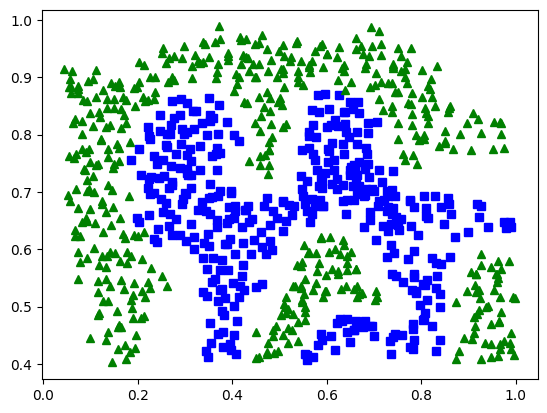

In [21]:
plt.plot(X[:,0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:,0][y==1], X[:, 1][y==1], "g^");

In [31]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
            ("poly_features", PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=10, loss="hinge",max_iter=100000,dual='auto'))
        ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, dual='auto', loss='hinge', max_iter=100000))])

In [23]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

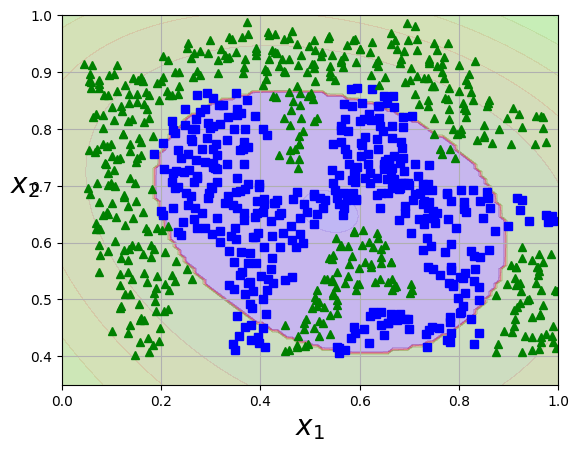

In [24]:
plot_predictions(polynomial_svm_clf, [0, 1, 0.35, 1])
plot_dataset(X, y, [0, 1, 0.35, 1])
plt.show()

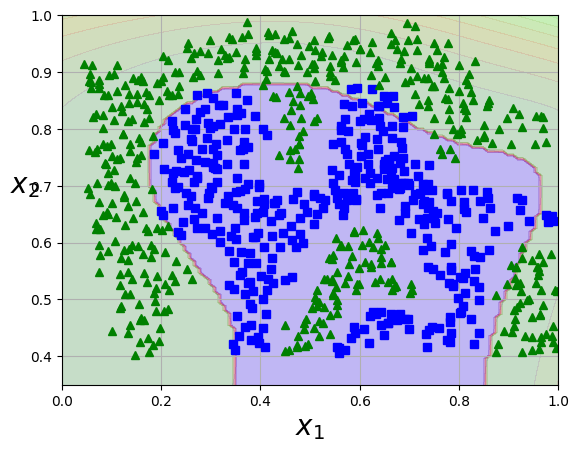

In [25]:
polynomial_svm_clf = Pipeline([
            ("poly_features", PolynomialFeatures(degree=10)),
            ("scaler", StandardScaler()),
            ("svm_clf", LinearSVC(C=1, loss="hinge",max_iter=1000000,dual='auto'))
        ])
polynomial_svm_clf.fit(X, y)
plot_predictions(polynomial_svm_clf, [0, 1, 0.35, 1])
plot_dataset(X, y, [0, 1, 0.35, 1])
plt.show()

In [26]:
y_pred = polynomial_svm_clf.predict(X)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.8435689455388181


### RBF (Radial Basis Function) Kernel

When using RBF kernel, two parameters must be considered: ```C``` and ```gamma```. 

- ```C```, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low ```C``` makes the decision surface smooth, while a high ```C``` aims at classifying all training examples correctly. 

- ```gamma``` defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of ```C``` and ```gamma``` is critical to the SVM’s performance. One is advised to use GridSearchCV or RandomSearchCV with ```C``` and ```gamma``` spaced exponentially far apart to choose good values.

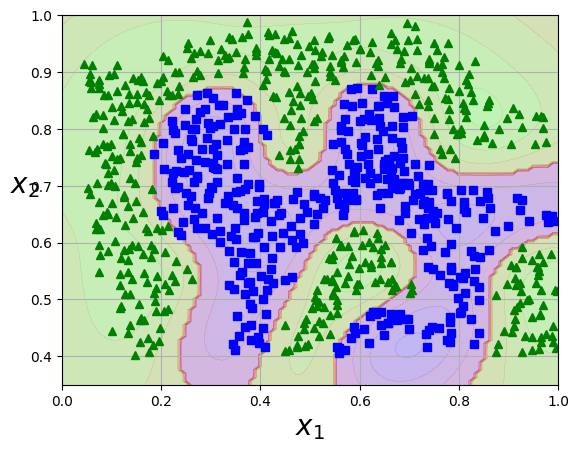

In [27]:
from sklearn.svm import SVC
svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svmclf", SVC(kernel='rbf',gamma=2))])
svm_clf.fit(X, y)
plot_predictions(svm_clf, [0, 1, 0.35, 1])
plot_dataset(X, y, [0, 1, 0.35, 1])
plt.show()

In [28]:
y_pred = svm_clf.predict(X)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.9884125144843569


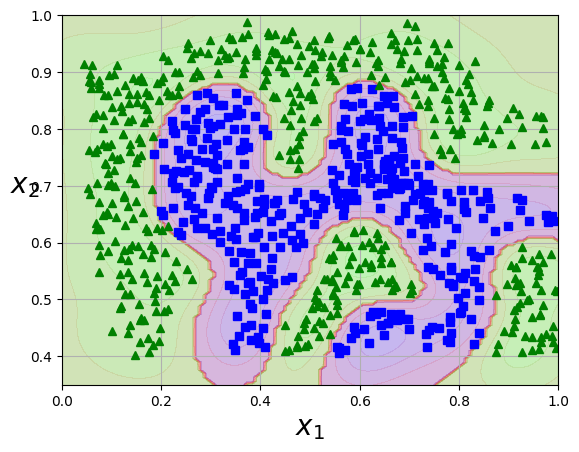

In [29]:
from sklearn.svm import SVC
svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svmclf", SVC(kernel='rbf',gamma=5))])
svm_clf.fit(X, y)
plot_predictions(svm_clf, [0, 1, 0.35, 1])
plot_dataset(X, y, [0, 1, 0.35, 1])
plt.show()

In [30]:
#Predict the response for test dataset
y_pred = svm_clf.predict(X)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.996523754345307
